In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Detected columns in original_df: {'specificity': 'Specificity', 'completeness': 'Completeness', 'coherence': 'Coherence', 'accuracy': 'Accuracy'}
Detected columns in reevaluated_df: {'specificity': 'Specificity', 'completeness': 'Completeness', 'coherence': 'Coherence', 'accuracy': 'Accuracy'}


/tmp/ipykernel_1505876/2017872625.py:65: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


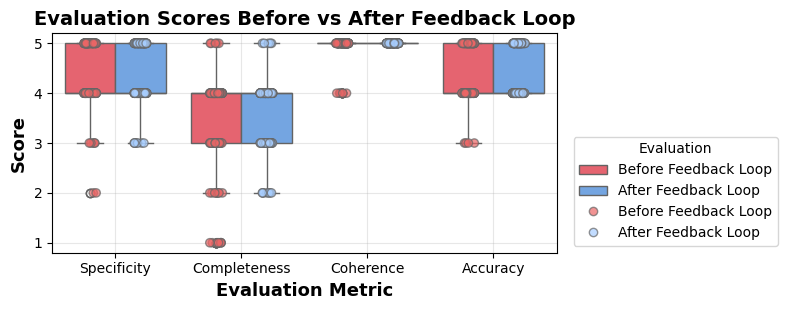

In [ ]:
#paths
original_file_path = "/data/users2/nblair7/newGemmaEval/assessment_scoresinitial.csv"  
reevaluated_file_path = "/data/users2/nblair7/newGemmaEval/assessment_scoresreeval.csv"  

original_df = pd.read_csv(original_file_path)
reevaluated_df = pd.read_csv(reevaluated_file_path)

original_df = original_df.rename(columns={'Participant_ID': 'participant_id'})
reevaluated_df = reevaluated_df.rename(columns={'Participant_ID': 'participant_id'})

expected_metrics = ['Specificity', 'Completeness', 'Coherence', 'Accuracy']

def detect_metric_columns(df, metrics):
    """Find best matching column names for each metric in df."""
    detected = {}
    for metric in metrics:
        matches = [c for c in df.columns if metric.lower() in c.lower()]
        if matches:
            detected[matches[0]] = metric
    return detected

# find and fix column name
original_detected = detect_metric_columns(original_df, expected_metrics)
reeval_detected = detect_metric_columns(reevaluated_df, expected_metrics)

print("Detected columns in original_df:", original_detected)
print("Detected columns in reevaluated_df:", reeval_detected)


original_selected = original_df[['participant_id'] + list(original_detected.keys())].copy()
original_selected = original_selected.rename(columns=original_detected)

reevaluated_selected = reevaluated_df[['participant_id'] + list(reeval_detected.keys())].copy()
reevaluated_selected = reevaluated_selected.rename(columns=reeval_detected)

# melt
original_melt = pd.melt(
    original_selected,
    id_vars=['participant_id'],
    value_vars=expected_metrics,
    var_name='Metric',
    value_name='Score'
)
original_melt['Evaluation'] = 'Before Feedback Loop'

reevaluated_melt = pd.melt(
    reevaluated_selected,
    id_vars=['participant_id'],
    value_vars=expected_metrics,
    var_name='Metric',
    value_name='Score'
)
reevaluated_melt['Evaluation'] = 'After Feedback Loop'


combined_data = pd.concat([original_melt, reevaluated_melt], ignore_index=True)


fig, ax = plt.subplots(figsize=(8, 3.2))

sns.boxplot(
    x='Metric', y='Score', hue='Evaluation', data=combined_data,
    ax=ax, palette=["#fb4e5f", "#62a3f3"]
)
sns.stripplot(
    x='Metric', y='Score', hue='Evaluation', data=combined_data,
    dodge=True, size=6, alpha=0.7, linewidth=1, edgecolor="gray",
    ax=ax, palette=["#ec6666", "#a8ceff"]
)

ax.set_title('Evaluation Scores Before vs After Feedback Loop', fontsize=14, fontweight='bold')
ax.set_xlabel('Evaluation Metric', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)

# y-axis ticks
ax.set_yticks(range(int(combined_data['Score'].min()), int(combined_data['Score'].max()) + 1))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# legend
ax.legend(title='Evaluation', fontsize=10, title_fontsize=10,
           bbox_to_anchor=(1.02, 0), loc='lower left', ncol=1)

# save
plt.rcParams['figure.dpi'] = 600
plt.tight_layout()
plt.savefig('OriginalvsReEval.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [3]:
metric_list = combined_data['Metric'].unique().tolist()
eval_list = combined_data['Evaluation'].unique().tolist()

for m in metric_list:
    for e in eval_list:
        score = combined_data[(combined_data['Metric'] == m) & (combined_data['Evaluation'] == e)]['Score']
        print(f'Metric: {m}, Evaluation: {e}, Mean+/-SD: {np.mean(score):.2f} \\pm {np.std(score):.2f}')

Metric: Specificity, Evaluation: Before Feedback Loop, Mean+/-SD: 4.37 \pm 0.62
Metric: Specificity, Evaluation: After Feedback Loop, Mean+/-SD: 4.38 \pm 0.58
Metric: Completeness, Evaluation: Before Feedback Loop, Mean+/-SD: 3.61 \pm 0.85
Metric: Completeness, Evaluation: After Feedback Loop, Mean+/-SD: 3.72 \pm 0.61
Metric: Coherence, Evaluation: Before Feedback Loop, Mean+/-SD: 4.96 \pm 0.20
Metric: Coherence, Evaluation: After Feedback Loop, Mean+/-SD: 5.00 \pm 0.00
Metric: Accuracy, Evaluation: Before Feedback Loop, Mean+/-SD: 4.33 \pm 0.53
Metric: Accuracy, Evaluation: After Feedback Loop, Mean+/-SD: 4.36 \pm 0.48
